In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np
import os

import argparse
from time import time

from utils import listDir
import AudioTransform

In [3]:
%reload_ext autoreload
%matplotlib inline

In [4]:
DATASET = "covers80"
BASE = "/Users/pasinduwijesena/Documents/university/research/experiments/data" 
CQT = "{}/{}_cqt/".format(BASE, DATASET)
CQT_LOG = "{}/{}_cqt_log/".format(BASE, DATASET)
WAV = "{}/{}".format(BASE, DATASET)

songsList = listDir(CQT, directoriesOnly=True)
songsList

['A_Whiter_Shade_Of_Pale',
 'Abracadabra',
 'Addicted_To_Love',
 'All_Along_The_Watchtower',
 'All_Tomorrow_s_Parties',
 'America',
 'Before_You_Accuse_Me',
 'Between_The_Bars',
 'Blue_Collar_Man',
 'Caroline_No',
 'Cecilia',
 'Claudette',
 'Cocaine',
 'Come_Together',
 'Day_Tripper',
 'Don_t_Let_It_Bring_You_Down',
 'Downtown_Lights',
 'Enjoy_The_Silence',
 'Faith',
 'God_Only_Knows',
 'Gold_Dust_Woman',
 'Grand_Illusion',
 'Happiness_is_a_Warm_Gun',
 'Heart_Of_Gold',
 'Hush',
 'I_Can_t_Get_Next_To_You',
 'I_Can_t_Get_No_Satisfaction',
 'I_Don_t_Like_Mondays',
 'I_Don_t_Want_To_Miss_A_Thing',
 'I_Love_You',
 'I_m_Losing_You',
 'I_m_Not_In_Love',
 'It_s_Tricky',
 'Lady',
 'Let_It_Be',
 'Little_Wing',
 'Lodi',
 'Love_Hurts',
 'Maggie_s_Farm',
 'More_Than_Words',
 'My_Generation',
 'My_Heart_Will_Go_On',
 'Never_Let_Me_Down_Again',
 'New_Age',
 'Night_Time_Is_The_Right_Time',
 'No_Woman_No_Cry',
 'Oh_Pretty_Woman',
 'Ooby_Dooby',
 'Proud_Mary',
 'Purple_Rain',
 'Rattlesnakes',
 'Real_Men

In [14]:
song = songsList[79]

performancesCQT = os.path.join(CQT, song)
performancesWAV = os.path.join(WAV, song)

subjects = listDir(performancesCQT)
indexes= [0,1] # [0,18]

print(subjects[indexes[0]])
print(subjects[indexes[1]])

subjects = [subjects[indexes[0]], subjects[indexes[1]]]

subjectsWAV = []
for subject in subjects:
    subjectName = '.'.join(subject.split('.')[:-1])
    subjectsWAV.append("{}.wav".format(subjectName))

beatles+1+11-Yesterday.npy
beatles+1+11-Yesterday_PITCH_SHIFT_0.npy


In [15]:
cqt = [
    np.load(os.path.join(performancesCQT, subjects[0])),
    np.load(os.path.join(performancesCQT, subjects[1]))
]

print(song)
print("\t", subjects[0])
print("\t", subjects[1])

print(cqt[0].shape)

Yesterday
	 beatles+1+11-Yesterday.npy
	 beatles+1+11-Yesterday_PITCH_SHIFT_0.npy
(84, 10813)


### Plotting the CQT results

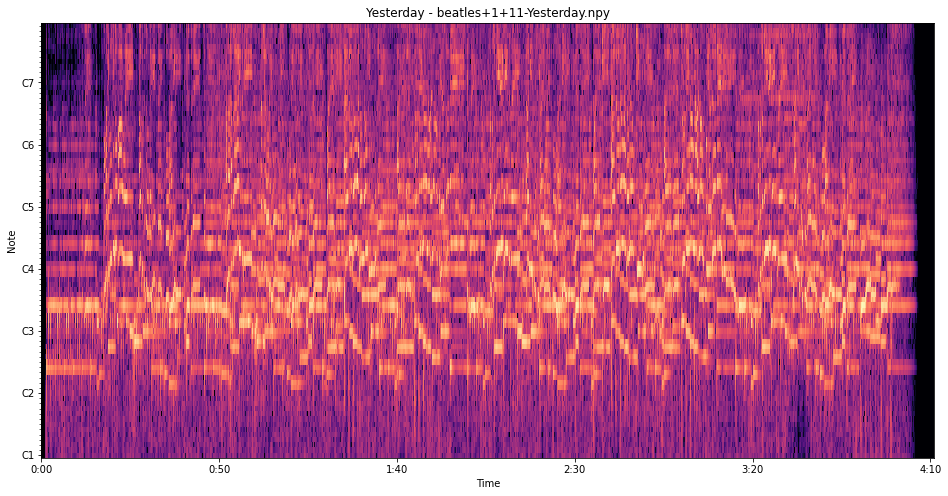

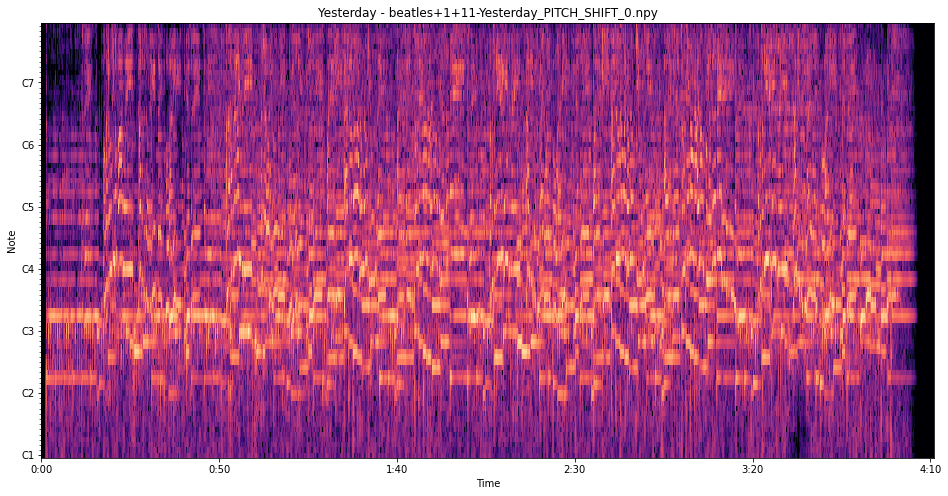

In [16]:
# C = np.abs(librosa.cqt(y, sr=sr))
# fig, ax = plt.subplots()
# img = librosa.display.specshow(librosa.amplitude_to_db(C, ref=np.max),
#                                sr=sr, x_axis='time', y_axis='cqt_note', ax=ax)

plt.figure(figsize=(16,8))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(cqt[0]), ref=np.max), x_axis="time", y_axis="cqt_note")
plt.title("{} - {}".format(song, subjects[0]))
plt.show()

plt.figure(figsize=(16,8))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(cqt[1]), ref=np.max), x_axis="time", y_axis="cqt_note")
plt.title("{} - {}".format(song, subjects[1]))
plt.show()

### Filtering only the max amphilitude item

(84, 10813)


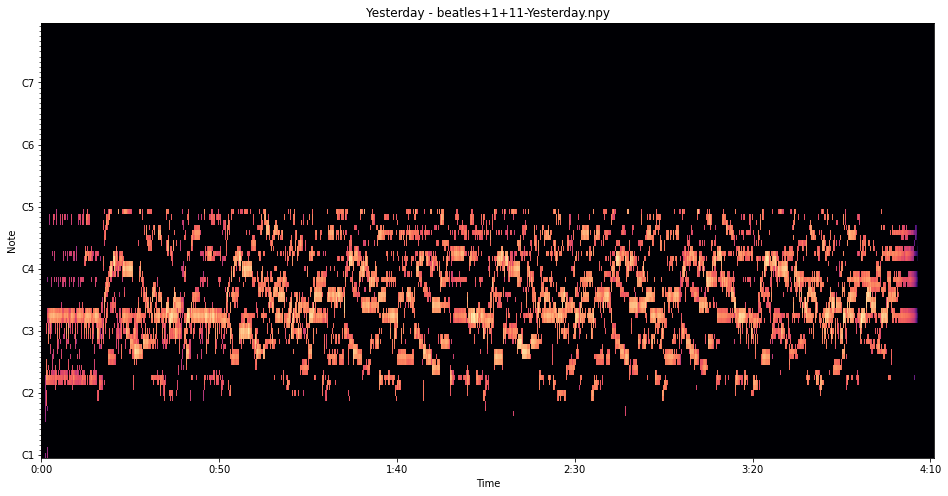

In [29]:
# Pick the maximum amphilitudes at each timesteps
mxcqt = np.copy(cqt[1])
# mxcqt[:24,:] = 0.0
mxcqt[-36:,:] = 0.0

mxcqtLog = librosa.amplitude_to_db(np.abs(mxcqt), ref=np.max)
# peaks = np.argmax(mxcqtLog, axis=0)
# print(mxcqt.shape, peaks.shape)
# for (index, peak) in enumerate(peaks):
#     for i in range(mxcqt.shape[0]):
#         if i != peak:
#             mxcqt[i,index] = 0.0

sortedPeaks = np.argsort(mxcqtLog, axis=0)
print(sortedPeaks.shape)

for (index, sortedPeak) in enumerate(np.transpose(sortedPeaks)):
    for i in sortedPeak[:-10]:
        mxcqt[i,index] = 0.0


mxcqtLog = librosa.amplitude_to_db(np.abs(mxcqt), ref=np.max)
plt.figure(figsize=(16,8))
librosa.display.specshow(mxcqtLog, x_axis="time", y_axis="cqt_note")
plt.title("{} - {}".format(song, subjects[0]))
plt.show()

### Finding the ratio between CQT time steps and original time steps

In [30]:
audio, sr = librosa.load(os.path.join(performancesWAV, subjectsWAV[0]))

audioDuration = audio.shape[0] / sr
cqtFrames = cqt[0].shape[1]

# Number of CQT frames per second
print(cqtFrames/audioDuration)

/Users/pasinduwijesena/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


86.13738678119539


We get roughly 86 CQT frames per second.
i.e. around 1 frame per every 11 milliseconds

### Generate audio to verify the quality

In [31]:
AudioTransform.InverseCQTransform().fun(mxcqt, "/Users/pasinduwijesena/Desktop/test4.wav")

/Users/pasinduwijesena/opt/anaconda3/envs/fyp/lib/python3.9/site-packages/librosa/core/constantq.py:670: UserWarning: hop_length=256 exceeds minimum CQT filter length=93.853.
This will probably cause unpleasant acoustic artifacts. Consider decreasing your hop length or increasing the frequency resolution of your CQT.
  warnings.warn(


array([-2.43847620e-06, -2.55938603e-06, -2.66743813e-06, ...,
       -2.00860495e-06, -2.16180447e-06, -2.30556585e-06])